In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6

In [29]:
movies = pd.read_csv('C:\\Users\\Root\\Desktop\\Movie-Ratings.csv')

In [30]:
len(movies)

559

In [31]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [32]:
movies.columns= ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [33]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [34]:
movies.Film = movies.Film.astype('category')

In [35]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [36]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [37]:
# Joint Plots

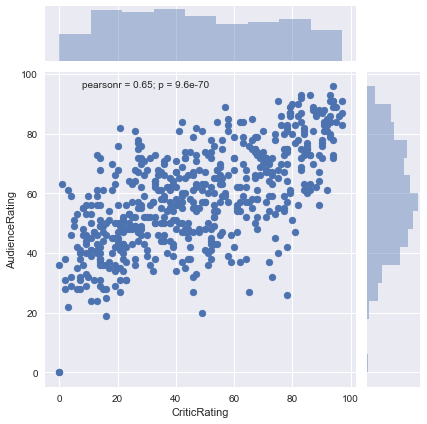

In [38]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating')

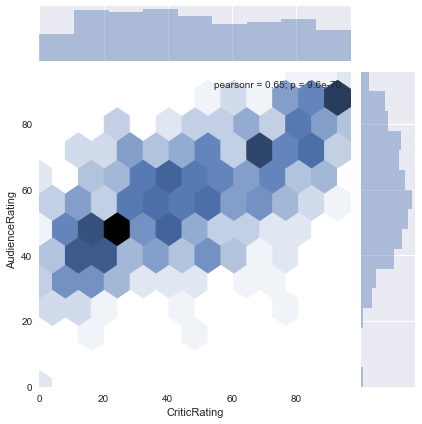

In [39]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

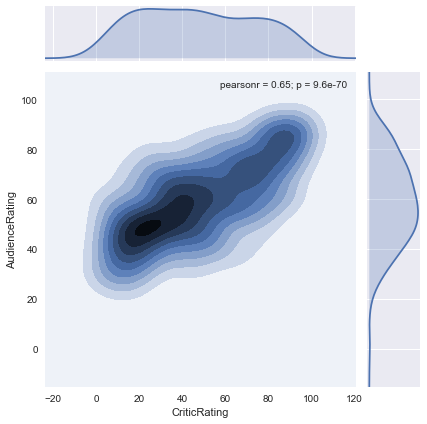

In [40]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'kde')

In [41]:
# Histograms

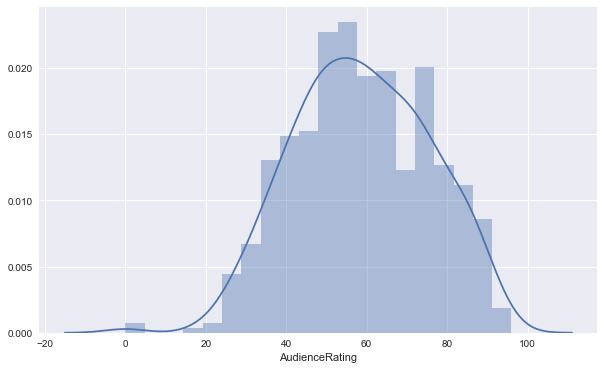

In [42]:
m1 = sns.distplot(movies.AudienceRating, bins = 20)

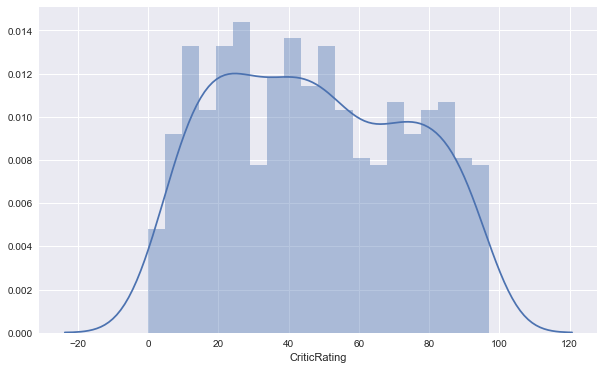

In [43]:
m1 = sns.distplot(movies.CriticRating, bins = 20)

In [44]:
# Stacked Histograms

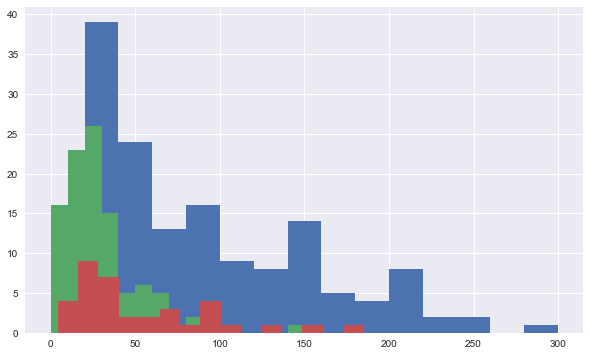

In [45]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.show()

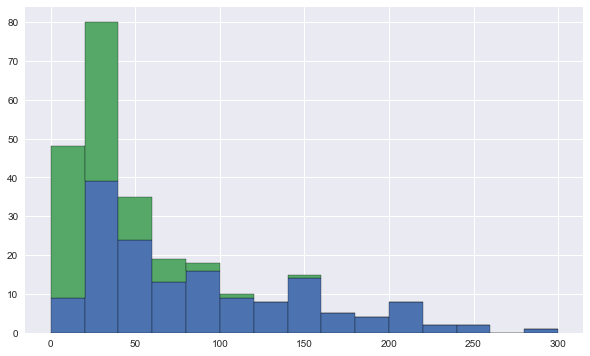

In [46]:
L1 = plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
               movies[movies.Genre == 'Drama'].BudgetMillions], \
               bins=15, stacked = True, edgecolor = "black")

In [47]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [48]:
for gen in movies.Genre.unique():
    print(gen)

Comedy
Adventure
Action
Horror
Drama
Romance
Thriller


In [49]:
list1 = list()
mylabel = list()
for gen in movies.Genre.unique():
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabel.append(gen)
print(list1)

[0       8
4      20
6      30
8      28
9       8
14     19
17     10
22     15
31     40
34     21
35     70
37     20
38     20
41     20
43     80
44      4
48     61
50     30
51     33
54     42
57     37
61     10
64      6
71     70
75     60
79      7
80      6
82     55
85     21
87      7
       ..
455    45
456    20
460    40
468    75
469    25
476    19
485    38
496    48
497    75
505    90
517    19
518    52
520    20
526    35
533    50
535    35
536    35
537    20
538    15
539     0
543    20
544    90
549    70
550    80
551    20
552    80
553    22
554    50
555    18
558    80
Name: BudgetMillions, Length: 172, dtype: int64, 1      105
3       18
19     200
21      45
24      40
32      78
46      20
65      38
68     140
130     73
165     12
166    125
167    250
168    150
176     36
178    150
192     70
193     60
241     60
272     37
341     19
363     70
386    130
401    155
459     59
463     25
506     38
540    100
548     60
Name: BudgetMillions,

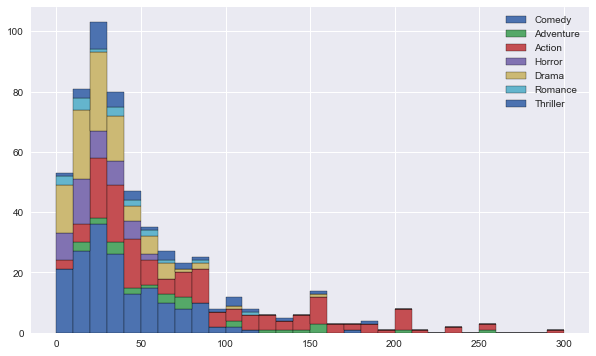

In [50]:
hist = plt.hist(list1, bins = 30, stacked = True, edgecolor = "black", rwidth = 1, label = mylabel)
plt.legend()
plt.show()

In [51]:
# Create a KDE plot

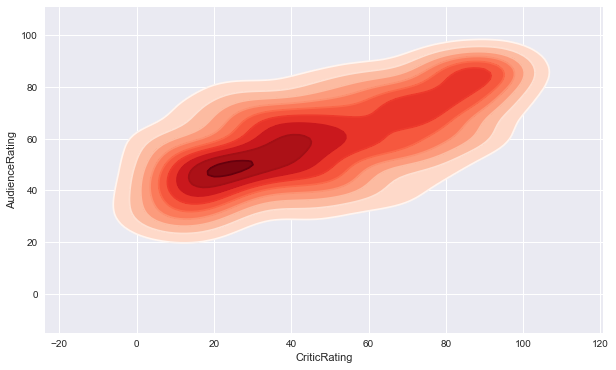

In [53]:
kde1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
                  shade = True, shade_lowest = False, cmap ='Reds')
kde2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
                  cmap = 'Reds')

In [ ]:
## Working with Subplots

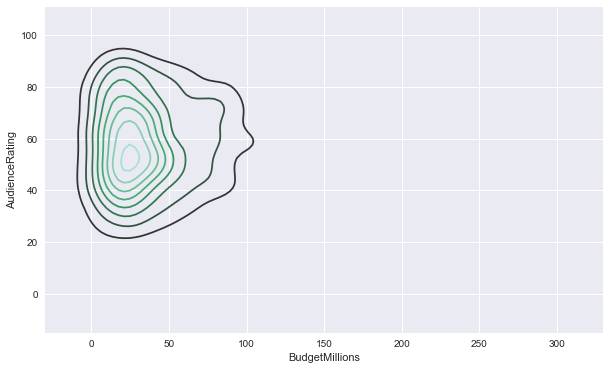

In [56]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

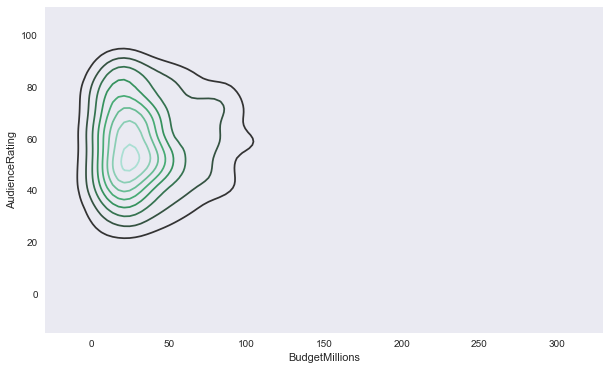

In [58]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

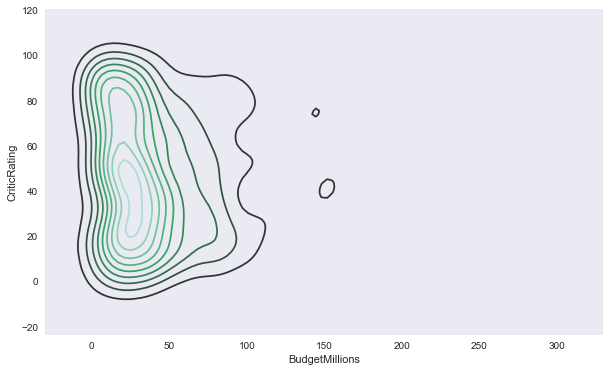

In [59]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

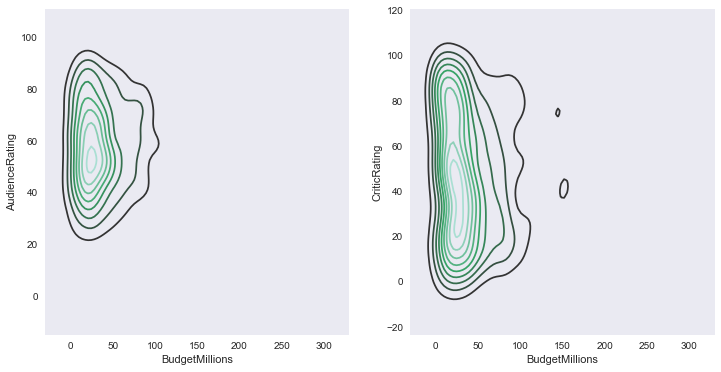

In [64]:
f, axes = plt.subplots(1, 2, figsize = (12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating , ax = axes[0])
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1])

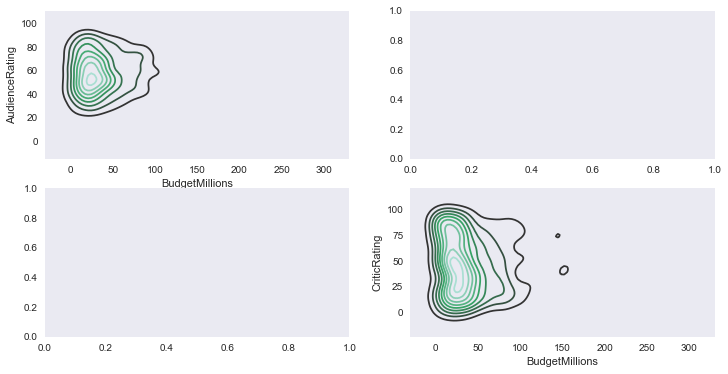

In [65]:
f, axes = plt.subplots(2, 2, figsize = (12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating , ax = axes[0,0])
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1,1])

[(-20, 160)]

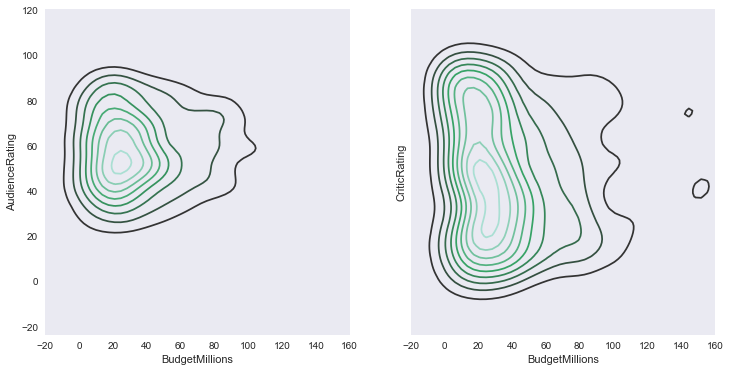

In [66]:
f, axes = plt.subplots(1, 2, figsize = (12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating , ax = axes[0])
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1])
k1.set(xlim = (-20, 160))